In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/Datasets/Fraud.csv'
df = pd.read_csv(dataset_path)

In [ ]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
print(df.shape)
df.head()

(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


DATA CLEANING

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


<Axes: xlabel='amount'>

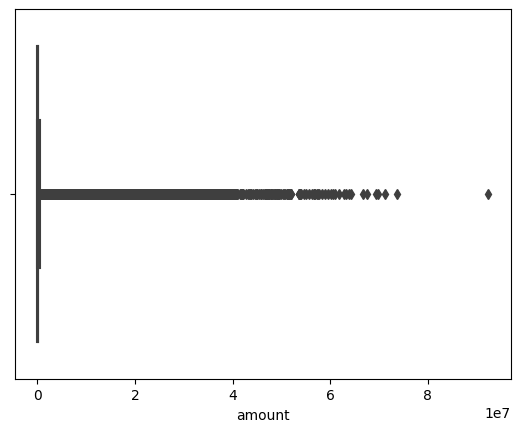

In [ ]:
sns.boxplot(x ='amount', data = df)

In [ ]:
outliers_amount = df[df['amount'] > 80000000].index
df.drop(outliers_amount , inplace=True)

<Axes: xlabel='newbalanceDest'>

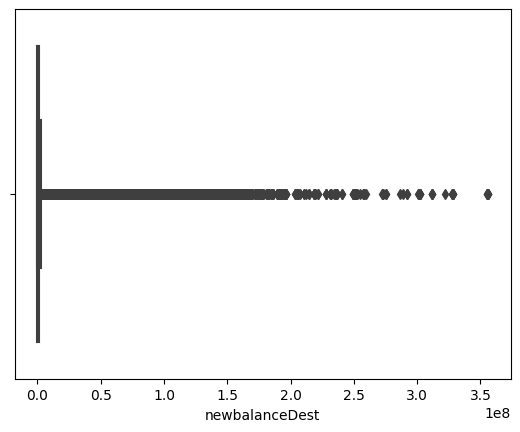

In [ ]:
sns.boxplot(x ='newbalanceDest', data = df)

In [ ]:
outliers_newbalanceDest = df[df['newbalanceDest'] > 350000000].index
df.drop(outliers_newbalanceDest , inplace=True)

<Axes: xlabel='oldbalanceDest'>

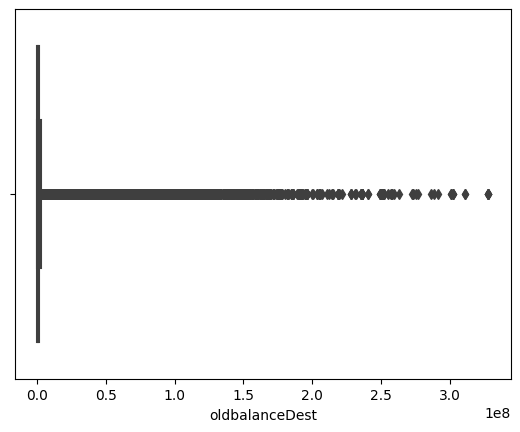

In [ ]:
sns.boxplot(x ='oldbalanceDest', data = df)

In [ ]:
outliers_oldbalanceDest = df[df['oldbalanceDest'] > 350000000].index
df.drop(outliers_oldbalanceDest , inplace=True)

<Axes: xlabel='oldbalanceOrg'>

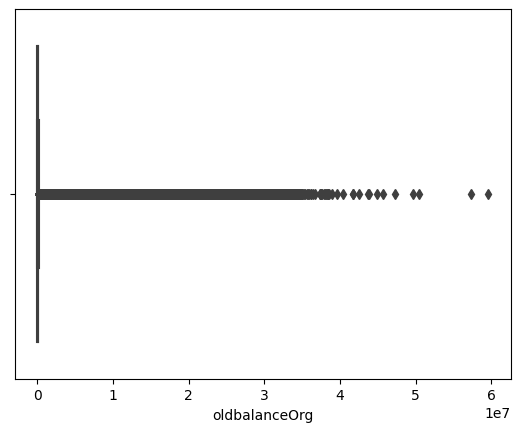

In [ ]:
sns.boxplot(x ='oldbalanceOrg', data = df)

In [ ]:
outliers_oldbalanceOrg = df[df['oldbalanceOrg'] > 60000000].index
df.drop(outliers_oldbalanceOrg , inplace=True)

<Axes: xlabel='newbalanceOrig'>

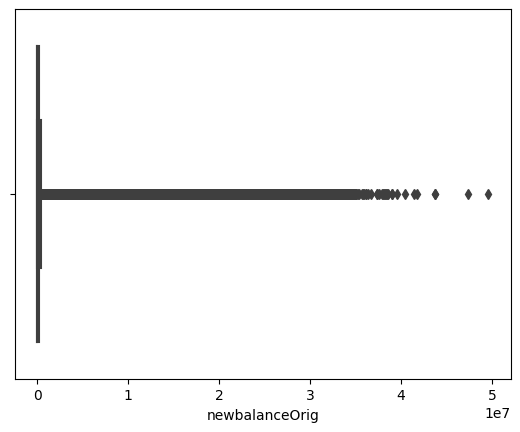

In [ ]:
sns.boxplot(x ='newbalanceOrig', data = df)

In [ ]:
outliers_newbalanceOrig = df[df['newbalanceOrig'] > 45000000].index
df.drop(outliers_newbalanceOrig , inplace=True)

DATA ANALYSIS

In [ ]:
new_df = df[['amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud',	'isFlaggedFraud']]

In [ ]:
X = new_df[list(new_df)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns

# Display the sorted vif_info DataFrame
sorted_vif_info = vif_info.sort_values('VIF', ascending=False)
print(sorted_vif_info)

          VIF          Column
2  544.503115  newbalanceOrig
1  542.794918   oldbalanceOrg
4   82.957875  newbalanceDest
3   71.030918  oldbalanceDest
0    3.938031          amount
5    1.185562         isFraud
6    1.002530  isFlaggedFraud


In [ ]:
new_df['balance_diff'] = new_df['oldbalanceOrg']-new_df['newbalanceOrig']
new_df['balance_diff'] = new_df['oldbalanceOrg']-new_df['newbalanceOrig']
fin_df=new_df.drop(['newbalanceOrig', 'oldbalanceOrg'], axis=1)
fin_df.head()

<ipython-input-21-08d9545b7165>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['balance_diff'] = new_df['oldbalanceOrg']-new_df['newbalanceOrig']
<ipython-input-21-08d9545b7165>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['balance_diff'] = new_df['oldbalanceOrg']-new_df['newbalanceOrig']


,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff
0,9839.64,0.0,0.0,0,0,9839.64
1,1864.28,0.0,0.0,0,0,1864.28
2,181.00,0.0,0.0,1,0,181.00
3,181.00,21182.0,0.0,1,0,181.00
4,11668.14,0.0,0.0,0,0,11668.14


(6362610, 11)


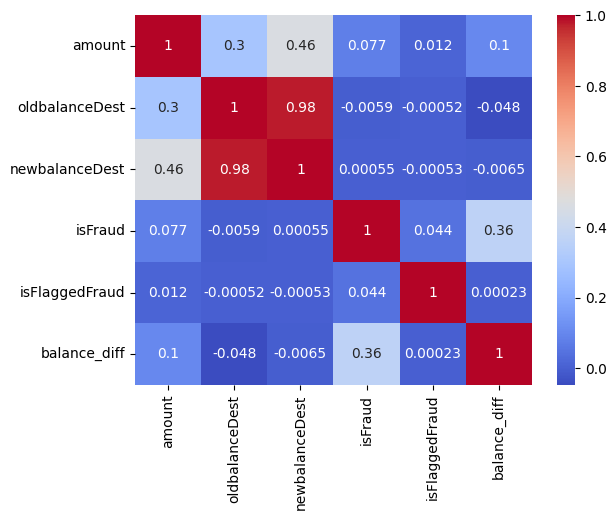

In [ ]:
print(df.shape)

correlation_matrix = fin_df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
x = fin_df.drop(['isFraud'], axis=1)
y = fin_df['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.005, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [75, 100, 150, 200],
    'max_depth': [9, 10, 12, 13]
}

In [ ]:
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid) #, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 10, 12, 13],
                         'n_estimators': [75, 100, 150, 200]})

In [ ]:
results_df = pd.DataFrame(grid_search.cv_results_)
subset_df = results_df[['param_n_estimators', 'param_max_depth', 'mean_test_score']]
subset_df['param_n_estimators'] = pd.to_numeric(subset_df['param_n_estimators'])

<ipython-input-46-527091e3f111>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['param_n_estimators'] = pd.to_numeric(subset_df['param_n_estimators'])


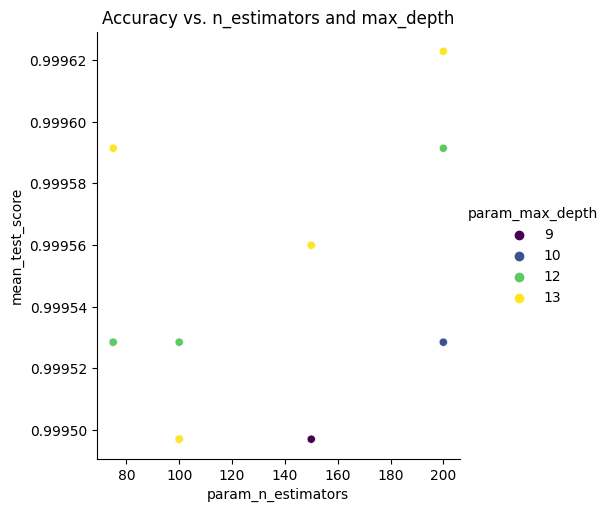

In [ ]:
sns.relplot(
    data=subset_df,
    x='param_n_estimators',
    y='mean_test_score',
    hue='param_max_depth',
    palette='viridis',
    kind='scatter'
)
plt.title('Accuracy vs. n_estimators and max_depth')
plt.show()


In [ ]:
best_param = grid_search.best_params_
final_rf_classifier = RandomForestClassifier(**best_param)
final_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, n_estimators=200)

In [ ]:
with open('fraud_model.pkl', 'wb') as file:
    pickle.dump(final_rf_classifier, file)

In [ ]:
with open('fraud_model.pkl', 'rb') as file:
    final_rf_classifier = pickle.load(file)

In [ ]:
y_pred = final_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", 100*accuracy,"%")

Accuracy: 99.92925061410119 %


In [ ]:
print(fin_df.shape)

(6362610, 6)


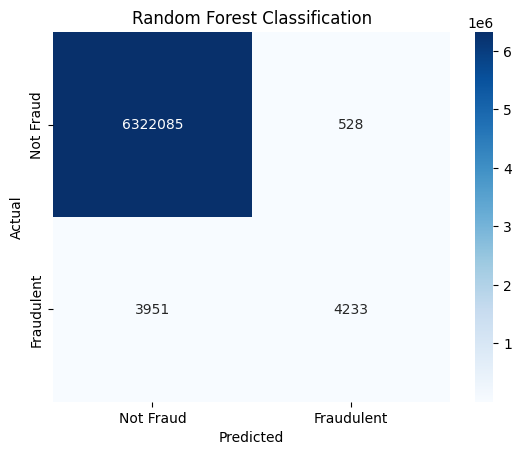

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

class_labels = ['Not Fraud', 'Fraudulent']

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classification')

# Set the x-axis and y-axis labels using class labels
plt.xticks(ticks=[.5, 1.5], labels=class_labels)
plt.yticks(ticks=[.5, 1.5], labels=class_labels)

plt.show()


In [ ]:
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   6322613
  Fraudulent       0.89      0.52      0.65      8184

    accuracy                           1.00   6330797
   macro avg       0.94      0.76      0.83   6330797
weighted avg       1.00      1.00      1.00   6330797



In [ ]:
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
# logregress = LogisticRegression()
# logregress.fit(X_train, y_train)

In [ ]:
# y_pred = logregress.predict(X_test)

In [ ]:
# print(classification_report(y_test, y_pred))

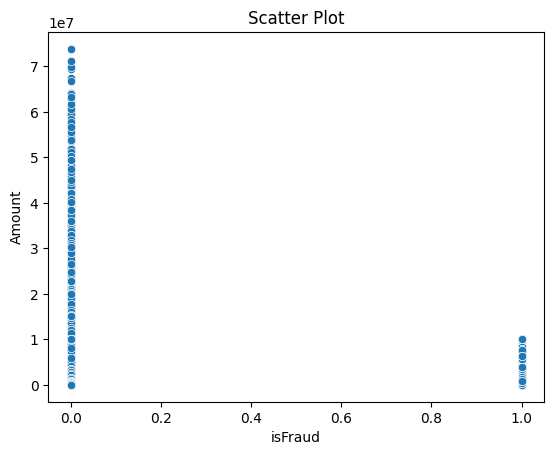

In [ ]:
sns.scatterplot(y=fin_df['amount'], x=fin_df['isFraud'])

# Set axis labels and plot title
plt.ylabel('Amount')
plt.xlabel('isFraud')
plt.title('Scatter Plot')

# Display the plot
plt.show()

In [ ]:
import tensorflow as tf

# Check if GPU is available
if tf.test.is_gpu_available():
    # Check if TensorFlow was built with CUDA support
    print("CUDA support is enabled:", tf.test.is_built_with_cuda())

    # Check if cuDNN is enabled
    if tf.config.list_physical_devices('GPU'):
        try:
            tf.keras.layers.Dense(1)
            print("cuDNN support is enabled")
        except tf.errors.NotFoundError:
            print("cuDNN support is not enabled")
else:
    print("GPU is not available")

GPU is not available


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
6.789478011000028
GPU (s):
0.096362900000031
GPU speedup over CPU: 70x
